#### Write this as a brief summary of your interests and intent, including:

* The kind of data you'd like to work with/field you're interested in (e.g., geodata, weather data, etc.)

* The kinds of questions you'll be asking of that data

* Possible source for such data

In other words, write down what kind of data you plan to work with, and what kinds of questions you'd like to ask of it. This constitutes your Project Proposal/Outline, and should look something like this:

> Our project is to uncover patterns in criminal activity around Los Angeles. We'll examine relationships between types of crime and location; crime rates and times of day; trends in crime rates over the course of the year; and related questions, as the data admits.

#### Finding Data

Once your group has written an outline, it's time to start hunting for data. You are free to use data from any source, but we recommend the following curated sources of high-quality data:

* [data.world](https://data.world/)

* [Kaggle](https://www.kaggle.com/)

* [Data.gov](https://www.data.gov)

* [Public APIs](https://github.com/abhishekbanthia/Public-APIs)

* [Awesome-APIs List](https://github.com/Kikobeats/awesome-api)

* [Medium APIs List](https://medium.com/@benjamin_libor/a-curated-collection-of-over-150-apis-to-build-great-products-fdcfa0f361bc)

Chances are you'll have to update your Project Outline as you explore the available data. **This is fine**—adjustments like this are part of the process! Just make sure everyone in the group is up-to-speed on the goals of the project as you make changes.

Make sure that your data is not too large for local analysis. **Big Data** datasets are difficult to manage locally, so consider a subset of that data or a different dataset altogether.

#### Data Cleanup & Analysis

With data in hand, it's time to tackle development and analysis. This is where the fun starts!

Inevitably, the analysis process can be broken into two broad phases: **Exploration & Cleanup** and **Analysis** proper.

As you've learned, you'll need to explore, clean, and reformat your data before you can begin to answer your research questions. We recommend keeping track of these exploration and cleanup steps in a dedicated Jupyter Notebook, both for organization's sake and to make it easier to  present your work later.

Similarly, after you've massaged your data and are ready to start crunching numbers, you should keep track of your work in a Jupyter Notebook dedicated specifically to analysis.

During both phases, **don't forget to include plots**! Don't make the mistake of waiting to build figures until you're preparing your presentation. Creating them along the way can reveal insights and interesting trends in the data that you might not notice otherwise.

We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.

Finally, be sure that your projects meet the [technical requirements](TechnicalRequirements.md).


### Import our dependicies 

In [64]:
import pandas as pd 
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import matplotlib as mpl
from pandas import DataFrame

%matplotlib inline

csv_pathSO = "overdose_processed_states.csv"
StateOverdose_df = pd.read_csv(csv_pathSO)

StateOverdose_df.head(10)

,State,Year,Deaths,Death_Rate,Pct_of_Total_Deaths,Multiple_Cause_of_death,log_of_Deaths,log_of_Pct_of_Deaths,log_of_Death_Rate
0,Wyoming,2000,NaN,NaN,NaN,Heroin,NaN,NaN,NaN
1,Wyoming,2000,NaN,NaN,NaN,Other opioids,NaN,NaN,NaN
2,Wyoming,2000,NaN,NaN,NaN,Methadone,NaN,NaN,NaN
3,Wyoming,2000,NaN,NaN,NaN,Other synthetic narcotics,NaN,NaN,NaN
4,Wyoming,2000,0.0,0.0,0.0,All Opioids,0.0,0.0,0.0
5,Wyoming,2001,NaN,NaN,NaN,Heroin,NaN,NaN,NaN
6,Wyoming,2001,NaN,NaN,NaN,Other opioids,NaN,NaN,NaN
7,Wyoming,2001,NaN,NaN,NaN,Methadone,NaN,NaN,NaN
8,Wyoming,2001,NaN,NaN,NaN,Other synthetic narcotics,NaN,NaN,NaN
9,Wyoming,2001,0.0,0.0,0.0,All Opioids,0.0,0.0,0.0


### Import data
    Import all data sets needed to analyze our hypothesis

In [65]:
StateOverdose_df = StateOverdose_df.dropna(how="any")
StateOverdose_df.head(10)

,State,Year,Deaths,Death_Rate,Pct_of_Total_Deaths,Multiple_Cause_of_death,log_of_Deaths,log_of_Pct_of_Deaths,log_of_Death_Rate
4,Wyoming,2000,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
9,Wyoming,2001,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
14,Wyoming,2002,10.0,0.0,0.0,All Opioids,2.302585,0.0,0.000000
19,Wyoming,2003,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
24,Wyoming,2004,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
29,Wyoming,2005,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
34,Wyoming,2006,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
39,Wyoming,2007,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
41,Wyoming,2008,24.0,5.8,0.0,Other opioids,3.178054,0.0,1.757858
44,Wyoming,2008,35.0,5.8,0.0,All Opioids,3.555348,0.0,1.757858


In [66]:
filter_data = StateOverdose_df [StateOverdose_df["Multiple_Cause_of_death"] =="All Opioids"]
#filter_data

### Clean Data
    -Merge tables with similar data
    -Rename columns
    -Delete duplicates


In [67]:
Grouped = filter_data.groupby(["State", "Year"])

pd.set_option('display.max_rows', None)
Grouped.first()

Deaths  Death_Rate  Pct_of_Total_Deaths  \
State                Year                                            
Alabama              2000    51.0         0.8                  0.0   
                     2001    55.0         1.6                  0.0   
                     2002    66.0         2.0                  0.0   
                     2003    50.0         1.5                  0.0   
                     2004   100.0         2.6                  0.0   
                     2005    85.0         2.1                  0.0   
                     2006   143.0         4.1                  0.0   
                     2007   174.0         5.0                  0.0   
                     2008   202.0         5.2                  0.0   
                     2009   225.0         5.9                  0.0   
                     2010   197.0         5.3                  0.0   
                     2011   192.0         4.8                  0.0   
                     2012   178.0         4.3                  0.0   
                     2013   187.0         5.0                  0.0   
                     2014   315.0         8.3                  0.0   
                     2015   315.0         8.4                  0.0   
Alaska               2000    21.0         4.8                  0.0   
                     2001    10.0         0.0                  0.0   
                     2002     0.0         0.0                  0.0   
                     2003    10.0         0.0                  0.0   
                     2004     0.0         0.0                  0.0   
                     2005     0.0         0.0                  0.0   
                     2006    25.0         0.0                  0.0   
                     2007     0.0         0.0                  0.0   
                     2008    96.0        16.3                  0.0   
                     2009   105.0        20.5                  0.0   
                     2010    83.0        13.8                  0.0   
                     2011    68.0         7.3                  0.0   
                     2012    74.0        11.7                  0.0   
                     2013    74.0        11.3                  0.0   
                     2014    94.0        12.3                  0.0   
                     2015   115.0        16.7                  0.0   
Arizona              2000   144.0         2.5                  0.0   
                     2001   156.0         4.0                  0.0   
                     2002   244.0         6.2                  0.0   
                     2003   294.0         7.3                  0.0   
                     2004   285.0         6.8                  0.0   
                     2005   333.0         7.7                  0.1   
                     2006   391.0         8.8                  0.1   
                     2007   408.0         8.9                  0.1   
                     2008   469.0        10.1                  0.1   
                     2009   560.0        11.9                  0.1   
                     2010   604.0        12.7                  0.1   
                     2011   550.0        11.2                  0.1   
                     2012   544.0        11.0                  0.1   
                     2013   523.0        10.4                  0.1   
                     2014   628.0        12.3                  0.2   
                     2015   716.0        13.8                  0.2   
Arkansas             2000     0.0         0.0                  0.0   
                     2001    14.0         0.0                  0.0   
                     2002   100.0         4.9                  0.0   
                     2003   121.0         5.9                  0.0   
                     2004   151.0         7.3                  0.0   
                     2005   144.0         6.9                  0.0   
                     2006   170.0         8.0                  0.0   
                     2007   179.0    

In [29]:
#pivottable = pd.pivot_table(filter_data, values='Deaths', index=['State'], columns=['Year'], aggfunc=np.sum)
#pivottable

In [68]:
csv_pathML = "states_and_dates_MEDRED.csv"
MarijuanaLegal_df = pd.read_csv(csv_pathML) 

#MarijuanaLegal_df

In [69]:
#merge_table = pd.merge(StateOverdose_df, MarijuanaLegal_df, left_on="State", right_on="State", how="left")
#merge_table 

merge_table = pd.merge(StateOverdose_df, MarijuanaLegal_df, left_on=["State","Year"], right_on=['states','Year'], how="left")
merge_table.count()


State                      3095
Year                       3095
Deaths                     3095
Death_Rate                 3095
Pct_of_Total_Deaths        3095
Multiple_Cause_of_death    3095
log_of_Deaths              3095
log_of_Pct_of_Deaths       3095
log_of_Death_Rate          3095
states                     2912
Medical                    2912
Recreational               2912
dtype: int64

In [70]:
merge_table = merge_table.dropna(how='any')
merge_table.count()

State                      2912
Year                       2912
Deaths                     2912
Death_Rate                 2912
Pct_of_Total_Deaths        2912
Multiple_Cause_of_death    2912
log_of_Deaths              2912
log_of_Pct_of_Deaths       2912
log_of_Death_Rate          2912
states                     2912
Medical                    2912
Recreational               2912
dtype: int64

In [71]:
#merge dataset together
merge_table_clean = merge_table [['State','Year','Death_Rate','Deaths','Multiple_Cause_of_death','Medical','Recreational']]
Main_Table =merge_table_clean [merge_table_clean["Multiple_Cause_of_death"] =="All Opioids"]
Main_Table

,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational
0,Wyoming,2000,0.0,0.0,All Opioids,False,False
1,Wyoming,2001,0.0,0.0,All Opioids,False,False
2,Wyoming,2002,0.0,10.0,All Opioids,False,False
3,Wyoming,2003,0.0,0.0,All Opioids,False,False
4,Wyoming,2004,0.0,0.0,All Opioids,False,False
5,Wyoming,2005,0.0,0.0,All Opioids,False,False
6,Wyoming,2006,0.0,0.0,All Opioids,False,False
7,Wyoming,2007,0.0,0.0,All Opioids,False,False
9,Wyoming,2008,5.8,35.0,All Opioids,False,False
10,Wyoming,2009,0.0,27.0,All Opioids,False,False


In [72]:
#cut in percent change in # of deaths to table
pchange=Main_Table['percent_change'] = Main_Table.groupby(["State"]).Deaths.pct_change(fill_method ='bfill')
Main_Table = Main_Table.replace([np.inf, -np.inf], np.nan)
Main_Table



/Users/sandybonbon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational,percent_change
0,Wyoming,2000,0.0,0.0,All Opioids,False,False,NaN
1,Wyoming,2001,0.0,0.0,All Opioids,False,False,NaN
2,Wyoming,2002,0.0,10.0,All Opioids,False,False,NaN
3,Wyoming,2003,0.0,0.0,All Opioids,False,False,-1.000000
4,Wyoming,2004,0.0,0.0,All Opioids,False,False,NaN
5,Wyoming,2005,0.0,0.0,All Opioids,False,False,NaN
6,Wyoming,2006,0.0,0.0,All Opioids,False,False,NaN
7,Wyoming,2007,0.0,0.0,All Opioids,False,False,NaN
9,Wyoming,2008,5.8,35.0,All Opioids,False,False,NaN
10,Wyoming,2009,0.0,27.0,All Opioids,False,False,-0.228571


### Analysis Question One:
Which drugs are considered opioids, and which have the highest mortality rate? Create a data frame that lists all drugs that are recognized as opioids in the US. Create a bar chart to visualize which opioids have the highest mortality rates.

,Deaths
Multiple_Cause_of_death,
Heroin,66580.0
Methadone,57770.0
Other opioids,131352.0
Other synthetic narcotics,42010.0


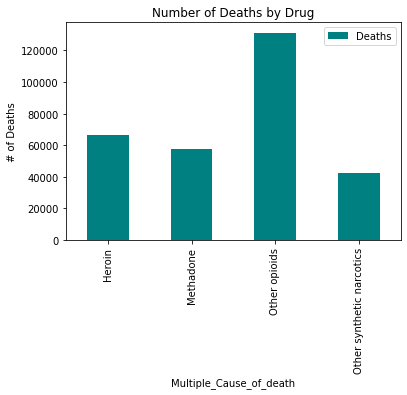

In [74]:
Opiods = merge_table [merge_table["Multiple_Cause_of_death"] !="All Opioids"]
#Drugs = Opiods.Multiple_Cause_of_death.unique()
Opiods = Opiods.groupby(["Multiple_Cause_of_death"]).sum()
Opiods = Opiods.loc[:,["Deaths"]]
Deaths = Opiods["Deaths"]

Opiods.plot(kind="bar",y='Deaths', use_index=True, color="Teal")
plt.title('Number of Deaths by Drug')
plt.ylabel("# of Deaths")
plt.show
Opiods

### Analysis Question Two:
Which states have the highest opioid drug abuse? Create a dataframe showing which states have the highest deaths per capita due to drug abuse. Graph this data. Create a graph that shows this

Text(0, 0.5, 'Death Rate')

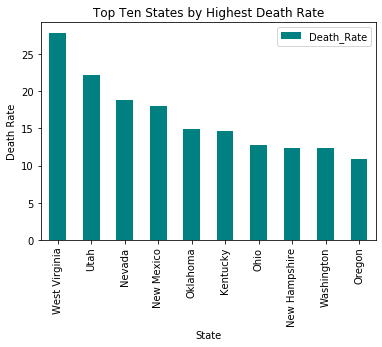

In [36]:
Mean_Data = pd.DataFrame(Main_Table.groupby(['State',])['Death_Rate'].mean())
Mean_Most = Mean_Data.nlargest(10,'Death_Rate')

Mean_Most.plot(kind="bar", y= "Death_Rate", color = 'teal', use_index=True)
plt.title('Top Ten States by Highest Death Rate')
plt.ylabel("Death Rate")

### Analysis Question Three:
Is there a difference with medical marijuana legalization and recreational marijuana legalization 


In [37]:
#Break data table into three seperate gorups. Never legal, Reacreational, Medical

#Recreational

States = Main_Table['State']
RecStates=[]

for index, row in Main_Table.iterrows():
    if row[6] == True:
        RecStates.append(row[0])
        
RecStates = set(RecStates)
print(RecStates)



{'Alaska', 'Washington', 'Colorado', 'Oregon'}


In [38]:
#get medical states
States = Main_Table['State']
MedicalStates=[]

for index, row in Main_Table.iterrows():
    if row[5] == True:
        if row[0] not in RecStates:
            MedicalStates.append(row[0])

MedicalStates=set(MedicalStates)
print(MedicalStates)


{'Montana', 'New York', 'Nevada', 'New Mexico', 'Louisiana', 'Vermont', 'Rhode Island', 'New Jersey', 'New Hampshire', 'Maine', 'Maryland', 'Hawaii', 'Connecticut', 'Arizona', 'Michigan', 'Illinois', 'California', 'Delaware'}


In [39]:
#Rec States Dataframe
RecStates_df = Main_Table[Main_Table['State'].isin(RecStates)]
RecStates_df = RecStates_df [RecStates_df["Death_Rate"] !=0]

RecStates_df.head()

,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational,percent_change
176,Washington,2000,5.8,257.0,All Opioids,True,False,NaN
181,Washington,2001,6.2,279.0,All Opioids,True,False,0.085603
186,Washington,2002,9.0,407.0,All Opioids,True,False,0.458781
191,Washington,2003,9.5,438.0,All Opioids,True,False,0.076167
196,Washington,2004,12.4,581.0,All Opioids,True,False,0.326484


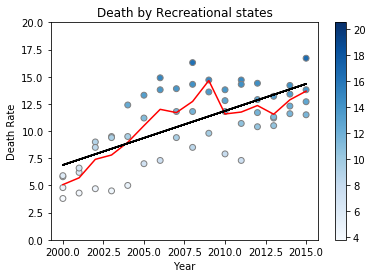

r value: 0.64424770958377


In [56]:
#Rec States linear regression
x = RecStates_df["Year"]
y = RecStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#get average for line plots
aveRec= RecStates_df.groupby(['Year'])
y2=aveRec.mean()["Death_Rate"]



plt.scatter(x,y,c=y, s=35, cmap=cm, edgecolors='grey')
plt.ylim(0, 50)
plt.plot(y2, color='r')
plt.plot(x,regress_values,"y-", color="black")
plt.colorbar()
plt.title('Death by Recreational states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.ylim(0,20) 
#plt.xlim(0, None) 

plt.show()
print(f'r value: {rvalue}')

In [51]:
#Medical States Dataframe
MedicalStates_df = Main_Table[Main_Table['State'].isin(MedicalStates)]
#MedicalStates_df

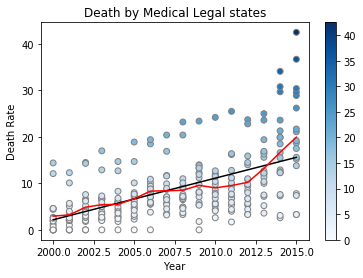

r value: 0.5804566281126241


In [58]:
#Medical stastes data analysis 
x = MedicalStates_df["Year"]
y = MedicalStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#get average for line plots
aveMed= MedicalStates_df.groupby(['Year'])
y2=aveMed.mean()["Death_Rate"]

plt.scatter(x,y, c=y, s=35, cmap=cm, edgecolors ='grey')
plt.plot(x,regress_values,"y-", color="black")
plt.plot(y2, color= 'r')
plt.title('Death by Medical Legal states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.colorbar()
plt.show()
print(f'r value: {rvalue}')

In [43]:
#States that have never legalized weed
States = Main_Table['State']
NeverStates=[]

for index, row in Main_Table.iterrows():
    if row[5] == False:
        if row[0] not in RecStates and row[0] not in MedicalStates:
            NeverStates.append(row[0])

NeverStates=set(NeverStates)
print(NeverStates)

{'Texas', 'Massachusetts', 'South Carolina', 'Ohio', 'Virginia', 'Kansas', 'Idaho', 'Utah', 'Nebraska', 'Wisconsin', 'West Virginia', 'Georgia', 'Iowa', 'Wyoming', 'North Carolina', 'Tennessee', 'South Dakota', 'Alabama', 'Oklahoma', 'Indiana', 'Pennsylvania', 'Florida', 'North Dakota', 'Kentucky', 'Missouri'}


In [59]:
#Dataframe for states taht have never legalized weed
NeverStates_df = Main_Table[Main_Table['State'].isin(NeverStates)]
#NeverStates_df

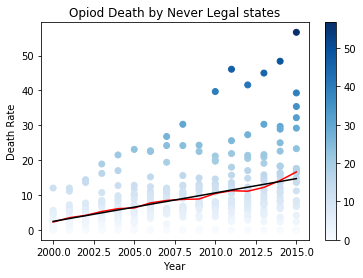

r value: 0.45590251351203165


In [60]:
#Never legalized data analysis
x = NeverStates_df["Year"]
y = NeverStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#averages for use with lineplot
aveMed= NeverStates_df.groupby(['Year'])
y2=aveMed.mean()["Death_Rate"]

plt.scatter(x,y, cmap=cm, c=y)
plt.plot(y2, color= 'r')
plt.plot(x,regress_values,"y-", color="black")
plt.title('Opiod Death by Never Legal states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.colorbar()
plt.show()
print(f'r value: {rvalue}')

### Other Visualizations

In [61]:
#import data top ten death rate states RX
csv_pathRX = "RXTopTen.csv"
RX = pd.read_csv(csv_pathRX) 
#RX

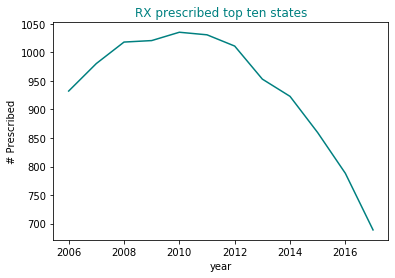

In [81]:
x=RX["Year"]
y=RX["Sum"]
plt.plot(x,y, Color="teal")
plt.title('RX prescribed top ten states', color="teal")
plt.xlabel('year')
plt.ylabel('# Prescribed')
plt.show()

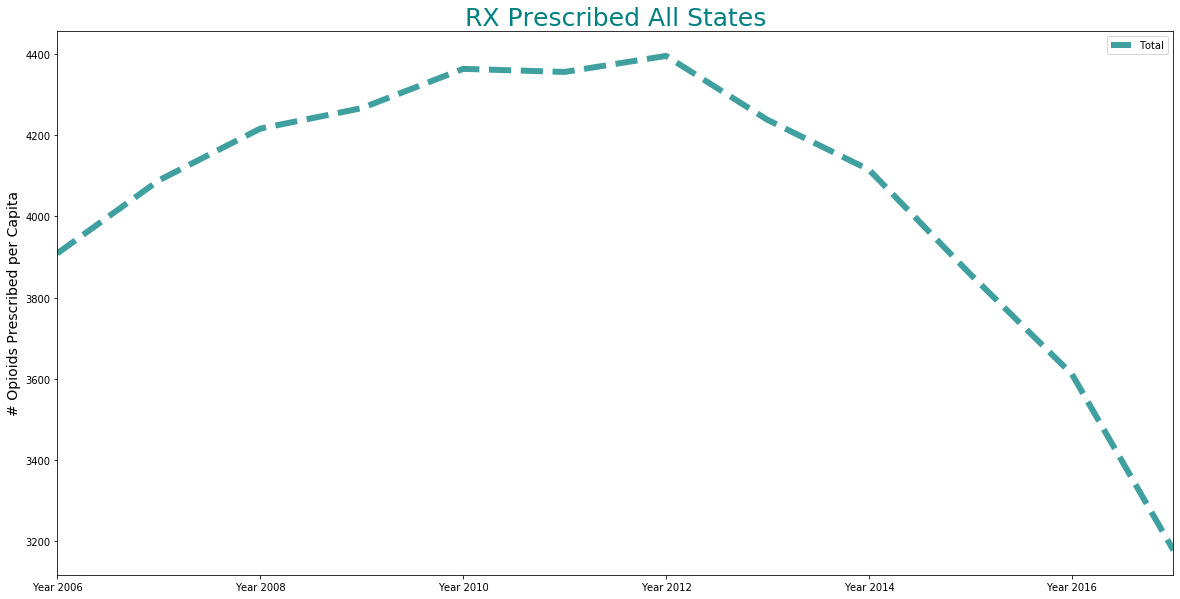

In [86]:
prescriptions_df = (pd.read_csv("Prescriptions.csv",index_col ="State"))
prescriptions_df.iloc[:0]
#prescriptions_df

sum_year = pd.DataFrame(prescriptions_df.sum(axis = 0, skipna = True) )
sum_year.rename(columns = {sum_year.columns[0]: 'Total'}, inplace = True)
sum_year.sort_index(inplace=True)
sum_year

sum_year.plot(y='Total', kind='line', alpha=0.75, color="teal", linewidth=6, linestyle='dashed', stacked=False, figsize=(20, 10))
plt.ylabel('# Opioids Prescribed per Capita', fontsize=14, fontweight=0)
plt.title('RX Prescribed All States', loc='center', fontsize=25, fontweight=0, color='teal')
plt.show()